Plots: LightProfilePlotter
==========================

This example illustrates how to plot a `LightProfile` using a `LightProfilePlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a simple `LightProfile` which we'll plot.

In [2]:
bulge = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, phi=45.0),
    intensity=1.0,
    effective_radius=0.8,
    sersic_index=4.0,
)

We also need the 2D grid the `LightProfile` is evaluated on.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the light profile and grid to a `LightProfilePlotter` and call various `figure_*` methods to 
plot different attributes.

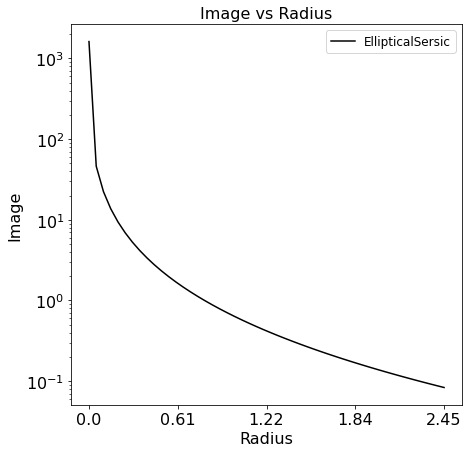

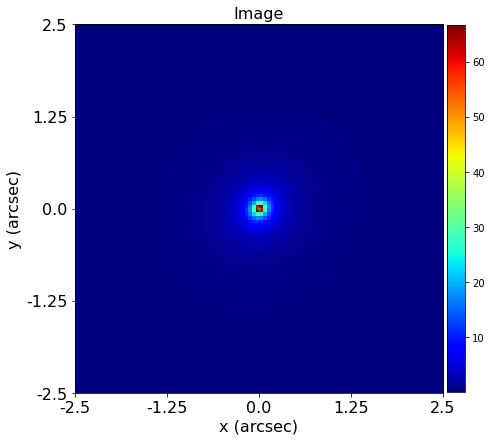

In [4]:
light_profile_plotter = aplt.LightProfilePlotter(light_profile=bulge, grid=grid)
light_profile_plotter.figures_1d(image=True)
light_profile_plotter.figures(image=True)

A `LightProfile` and its `Grid2D` contains the following attributes which can be plotted automatically via 
the `Include2D` object.

(By default, a `Grid2D` does not contain a `Mask2D`, we therefore manually created a `Grid2D` with a mask to illustrate
plotting its mask and border below).

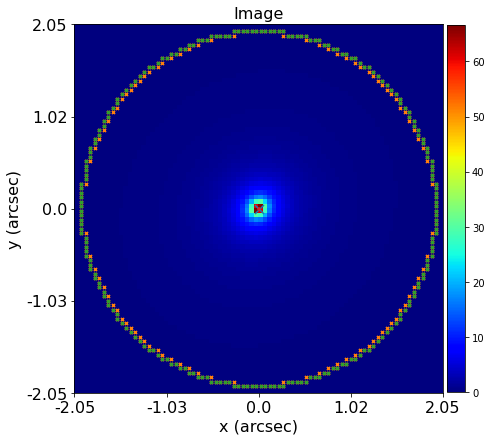

In [5]:
mask = al.Mask2D.circular(
    shape_native=grid.shape_native,
    pixel_scales=grid.pixel_scales,
    radius=2.0,
    sub_size=grid.sub_size,
)
masked_grid = al.Grid2D.from_mask(mask=mask)

include_2d = aplt.Include2D(
    origin=True, mask=True, border=True, light_profile_centres=True
)
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=bulge, grid=masked_grid, include_2d=include_2d
)
light_profile_plotter.figures(image=True)

Finish.